In [10]:
# Trading Strategy for Long:
def LongPosition(seq):
    status = 0
    PriceBuy = []
    PriceSell = []
    Revenue = []
    TransactionDays = []
    temp_buyprice = -1
    temp_buyindex = -1
    for i in range(len(seq)):
        if seq['Close_short'][i]> seq['Close_long'][i]:
            # signal to Buy: 
            if status != 1:
                # You do not have any position but you get the buying signal:
                # --> you shall buy one position.
                status = 1
                PriceBuy.append(seq['Open'][i+1])
                PriceSell.append(np.nan)
                TransactionDays.append(np.nan)
                temp_buyprice = seq['Open'][i+1]
                temp_buyindex = i+1
                Revenue.append(np.nan)
            else: 
                # You already have a position, and you still get the buying signal:
                # --> The stock price goes up and you shall keep holding the position.
                PriceBuy.append(np.nan)
                PriceSell.append(np.nan)
                TransactionDays.append(np.nan)
                Revenue.append(np.nan)
        elif seq['Close_short'][i]< seq['Close_long'][i]:
            # signal to Sell:
            if status != 0:
                # You hold a position, but you get a signal for sell
                # --> you shall sell the position as soon as possible.
                status = 0
                PriceBuy.append(np.nan)
                PriceSell.append(seq['Open'][i+1])
                Revenue.append(seq['Open'][i+1] - temp_buyprice)
                TransactionDays.append(i+1 - temp_buyindex)
                
            else: 
                # You do not have any position, and you get a signal for sell
                # --> you can ignore the selling signal.
                PriceBuy.append(np.nan)
                PriceSell.append(np.nan)
                Revenue.append(np.nan)
                TransactionDays.append(np.nan)
        else:
            # There is no clear signal. Keep waiting for buying or selling signals.
            PriceBuy.append(np.nan)
            PriceSell.append(np.nan)
            Revenue.append(np.nan)
            TransactionDays.append(np.nan)
            
    return (PriceBuy, PriceSell, Revenue, TransactionDays)

Text(0, 0.5, 'Close Price USD ($)')

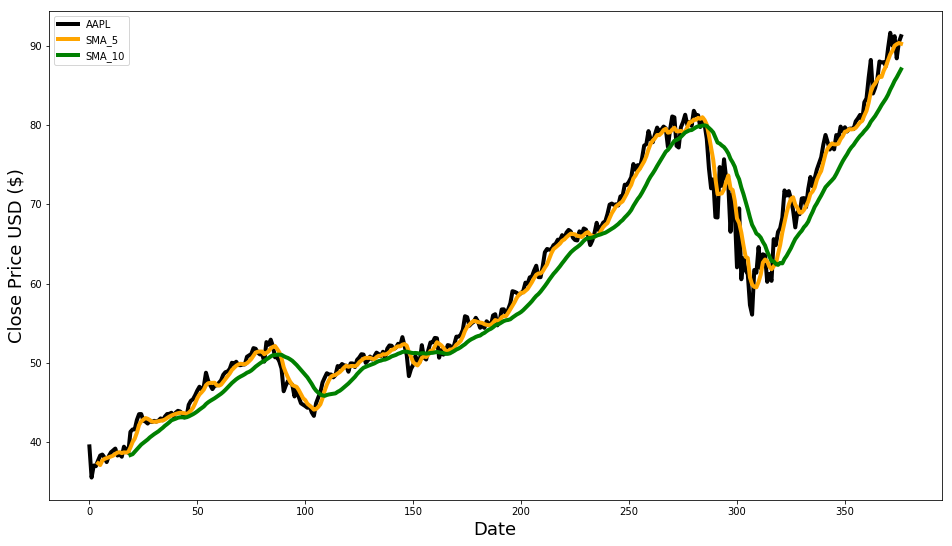

In [12]:
# Sample code for Algprithm Trading with Python:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read stock data first:
df = pd.read_excel('AAPL_2019_2020.xlsx')

# compute Simple Moving Average for closing price to extract the trend in time domain:
df['Close_short'] = df['Close'].rolling(window = 5).mean()
df['Close_long'] = df['Close'].rolling(window = 20).mean()

# Visualize the closing price and SMA sequences:
fig = plt.subplots(figsize=(16,9))
plt.plot(df.index, df['Close'].values, color='black', label='AAPL', linewidth=4)
plt.plot(df.index, df['Close_short'].values, color ='orange', label='SMA_5', linewidth=4)
plt.plot(df.index, df['Close_long'].values, color ='green', label='SMA_10', linewidth=4)
plt.legend()
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)



Text(0, 0.5, 'Close Price USD ($)')

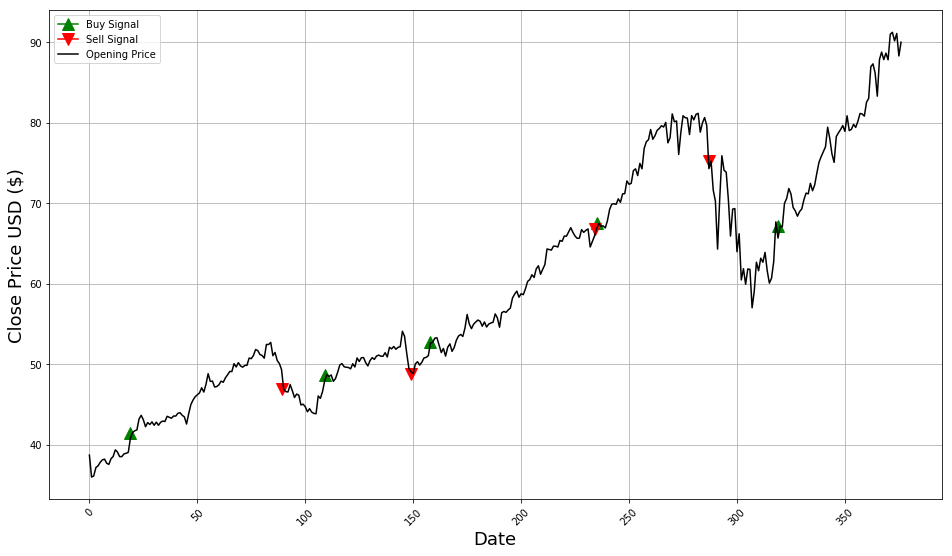

In [13]:
# Visualize the Long strategy:
Long = LongPosition(df)
df['Buy Price_Long'] = Long[0]
df['Sell Price_Long'] = Long[1]
df['Revenue_Long'] = Long[2]
fig = plt.subplots(figsize=(16,9))
plt.plot(df.index, df['Buy Price_Long'].values, color ='green', label='Buy Signal', marker = '^', markersize=12)
plt.plot(df.index, df['Sell Price_Long'].values, color ='red', label='Sell Signal', marker = 'v', markersize=12)
plt.plot(df['Open'],  color ='black', label='Opening Price')
plt.legend(loc='upper left')
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)


